## COGS 260 Assignment3

### 1 Least Square Estimation

In [134]:
# 1.1 Import packages and load data
import numpy as np
import matplotlib.pyplot as plt
X_and_Y = np.load('./q1-least-square.npy')
X = X_and_Y[:, 0] # Shape: (300,)
Y = X_and_Y[:, 1] # Shape: (300,)

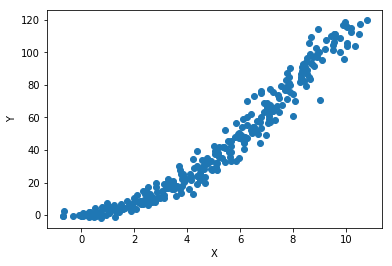

In [52]:
# 1.2 Plot the scatter graph of data
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [40]:
# 1.3 Compute the least square line over the given data.
# Assume Y = w0 + w1*X = (w0, w1).(1, X) = W.X1
# X1 contains 1 and X.
X1 = np.matrix(np.hstack((np.ones((len(X),1)),X.reshape(-1,1))))
W = X1.T.dot(X1).I.dot(X1.T).dot(Y)
w0, w1 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X'.format(w0, w1))

Y = -15.47 + 11.61*X


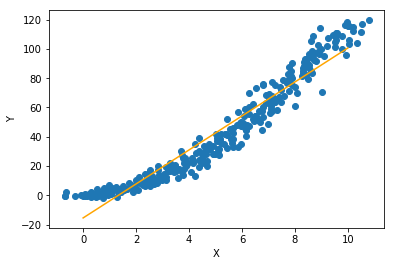

In [42]:
# 1.4 Plot the scatter graph of data and estimated line.
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('imgs/1_1.png')
plt.show()

In [33]:
# 1.5 Compute the least square parabola over the given data.
# Assume Y = w0 + w1*X + w2*Xˆ2 = (w0, w1, w2).(1, X, Xˆ2) = W.X2
# X2 contains 1, X and Xˆ2.
X2 = np.matrix(np.hstack((np.hstack((np.ones((len(X),1)),X.reshape(-1,1))),X.reshape(-1,1)**2)))
W = X2.T.dot(X2).I.dot(X2.T).dot(Y)
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*Xˆ2'.format(w0, w1, w2))

Y = -1.71 + 3.02*X + 0.87*Xˆ2


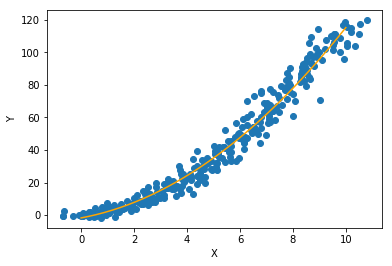

In [35]:
# 1.6 Plot the scatter graph of data and estimated parabola
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('imgs/1_2.png')
plt.show()

### 2 Parabola Estimation

In [109]:
# 2.1 Import packages and load data
import numpy as np
import matplotlib.pyplot as plt
X_and_Y = np.load('./q2-parabola.npy')
X = X_and_Y[:, 0] # Shape: (300,)
Y = X_and_Y[:, 1] # Shape: (300,)

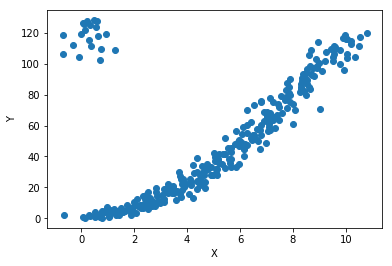

In [110]:
# 2.2 Plot the scatter graph of data
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

We are comparing the robustness of different loss definition so we can see a bunch of outliers at the upleft corner.

In [111]:
# 2.3 Compute the least square(L2 norm) parabola over the given data.
# Assume Y = w0 + w1*X + w2*Xˆ2 = (w0, w1, w2).(1, X, Xˆ2) = W.X2
# X2 contains 1, X and Xˆ2.
X1 = np.matrix(np.hstack((np.hstack((np.ones((len(X),1)),X.reshape(-1,1))),X.reshape(-1,1)**2)))
W = X1.T.dot(X1).I.dot(X1.T).dot(Y)
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*Xˆ2'.format(w0, w1, w2))

Y = 51.07 + -16.06*X + 2.36*Xˆ2


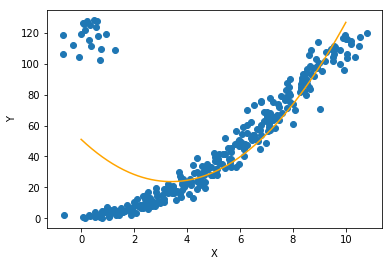

In [112]:
# 2.4 Plot the scatter graph of data and estimated parabola
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('imgs/2_1.png')
plt.show()

In [124]:
# 2.5 Compute the L1 norm loss parabola over the given data.
# Assume Y = w0 + w1*X + w2*Xˆ2 = (w0, w1, w2).(1, X, Xˆ2) = W.X2
# X2 contains 1, X and Xˆ2.
X2 = np.matrix(np.hstack((np.hstack((np.ones((len(X),1)),X.reshape(-1,1))),X.reshape(-1,1)**2)))
Y2 = np.expand_dims(Y,1)
# First randomly pick a W
W = np.random.normal(0,5,(3,1))
# Define the L1-norm loss
loss = np.sum(np.abs(X2.dot(W) - Y2))
# gradient descent parameters (refer to the hint)
num_point = len(Y)
max_iterations = 300000
learning_rate = 0.000001
threshold = 0.00001
iters = 0
while loss/num_point > threshold and iters < max_iterations:
    grad = np.sign(X2.dot(W) - Y2).T.dot(X2).T
    W = W - learning_rate*grad
    loss = np.sum(np.abs(X2.dot(W) - Y2))
    iters += 1
print("total iterations %d \t average loss %f"%(iters,loss/num_point))    
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*Xˆ2'.format(w0, w1, w2))

total iterations 300000 	 average loss 12.058130
Y = 2.48 + 0.77*X + 1.08*Xˆ2


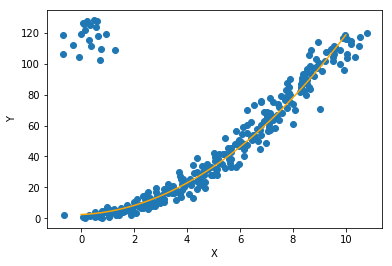

In [125]:
# 2.6 Plot the scatter graph of data and estimated parabola
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('imgs/2_2.png')
plt.show()

### 3 Perceptron Learning

In [110]:
# 3.1 Dataset
from sklearn import preprocessing
import numpy as np
import pandas as pd

# load iris_train.data and iris_test.data
pd_train = pd.read_csv("iris/iris_train.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])
pd_test = pd.read_csv("iris/iris_test.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])

# parse the features and labels as numpy arrays.
X_train = pd_train.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_train = pd_train.as_matrix(columns=["label"]).ravel()
X_test = pd_test.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_test = pd_test.as_matrix(columns=["label"]).ravel()

# Encode labels
le = preprocessing.LabelEncoder()
le.fit(y_train)
print(le.classes_)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

['Iris-setosa' 'Iris-versicolor']


In [115]:
type(pd_train)

pandas.core.frame.DataFrame

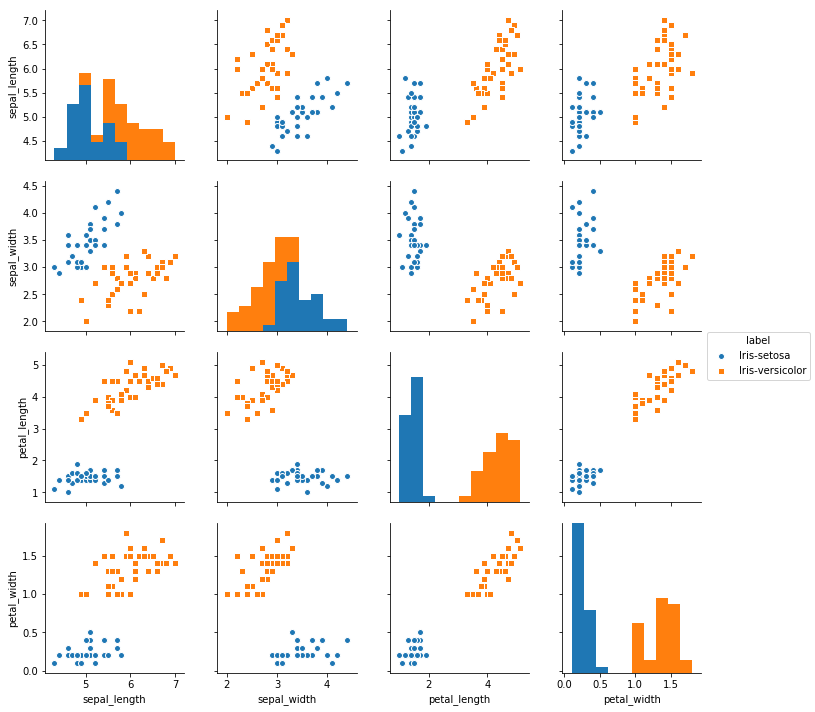

In [119]:
import seaborn as sns
g = sns.pairplot(pd_train,hue="label",markers=["o", "s"])

iter  1 	 loss 1.000000
iter  2 	 loss 0.500000
iter  3 	 loss 0.500000
iter  4 	 loss 0.500000
iter  5 	 loss 0.500000
iter  6 	 loss 0.500000
iter  7 	 loss 0.500000
iter  8 	 loss 0.057143
iter  9 	 loss 0.500000
iter 10 	 loss 0.085714
iter 11 	 loss 0.500000
iter 12 	 loss 0.371429
iter 13 	 loss 0.500000
iter 14 	 loss 0.485714
iter 15 	 loss 0.014286
iter 16 	 loss 0.500000
iter 17 	 loss 0.000000


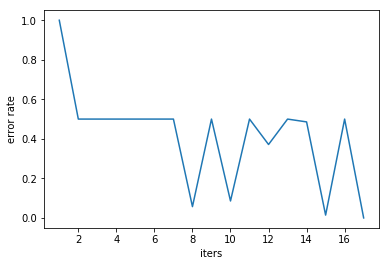

In [299]:
# 3.2 Programming
W = np.random.normal(0,5,(4,1))
b = np.random.normal(0,5,1)
y_predict = (X_train.dot(W)+b>0).reshape(-1)
loss = np.sum(y_predict!=y_train)

num_point = len(y_train)
max_iterations = 300000
Lambda = 1
iters = 0
loss_list = []
while loss > 0 and iters < max_iterations:
    rand_int = np.random.randint(num_point)
    y_predict = X_train[rand_int].dot(W)+b>0
    if y_train[rand_int] == y_predict:
        continue
    else:
        W = W + Lambda*(y_train[rand_int]-y_predict)*np.expand_dims(X_train[rand_int],1)
        b = b + Lambda*(y_train[rand_int]-y_predict)    
    y_predict = (X_train.dot(W)+b>0).reshape(-1)
    loss = np.sum(y_predict!=y_train)/num_point
    iters += 1
    loss_list.extend([loss])
    print("iter %2d \t loss %f"%(iters,loss))

plt.plot(range(1,1+iters),loss_list)
plt.xlabel('iters')
plt.ylabel('error rate')
plt.show()

In [300]:
# 3.3 Decision Boundary
w0, w1, w2, w3 = np.array(W).reshape(-1)
b = b[0]
print('Y = {:.2f}*sepal_length + {:.2f}*sepal_width + {:.2f}*petal_length + {:.2f}*petal_width + {:.2f}'.format(w0, w1, w2, w3, b))

Y = 2.14*sepal_length + -15.07*sepal_width + 7.66*petal_length + 6.91*petal_width + 2.32


In [301]:
# 3.4 Test
# 1.accuracy
num_point = len(y_test)
y_predict = (X_test.dot(W)+b>0).reshape(-1)
accuracy = np.sum(y_predict == y_test) / num_point
print('accuracy:\t', accuracy)
# For the following, let y_test==1 be positive
true_positive = np.sum(np.logical_and(y_test==1,y_predict==1))
# 2.Precision
precision = true_positive/np.sum(y_predict)
print('precision:\t', precision)
# 3.Recall
recall = true_positive/np.sum(y_test)
print('recall:\t\t',recall)
# 4.F-value
F_value = 2*precision*recall / (precision + recall)
print('F-value:\t',F_value)

accuracy:	 1.0
precision:	 1.0
recall:		 1.0
F-value:	 1.0


iter  1 	 loss 0.500000
iter  2 	 loss 0.285714
iter  3 	 loss 0.057143
iter  4 	 loss 0.000000


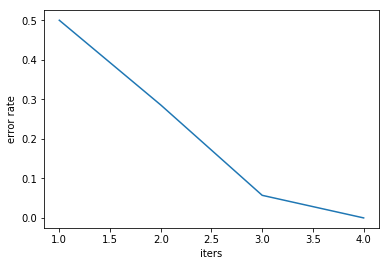

Y = 5.46*sepal_length + -3.56*sepal_width + 1.39*petal_length + 0.23*petal_width + 3.19
accuracy:	 0.5
precision:	 0.5
recall:		 1.0
F-value:	 0.6666666666666666


In [287]:
# 3.5 [bonus]Z-score
X_mean = np.mean(X_train,axis=0)
X_var = np.var(X_train,axis=0)

X_train_normalized = (X_train-X_mean)/X_var

W = np.random.normal(0,5,(4,1))
b = np.random.normal(0,5,1)
y_predict = (X_train_normalized.dot(W)+b>0).reshape(-1)
loss = np.sum(y_predict!=y_train)

num_point = len(y_train)
max_iterations = 300000
Lambda = 1
iters = 0
loss_list = []
while loss > 0 and iters < max_iterations:
    rand_int = np.random.randint(num_point)
    y_predict = X_train_normalized[rand_int].dot(W)+b>0
    if y_train[rand_int] == y_predict:
        continue
    else:
        W = W + Lambda*(y_train[rand_int]-y_predict)*np.expand_dims(X_train_normalized[rand_int],1)
        b = b + Lambda*(y_train[rand_int]-y_predict)    
    y_predict = (X_train_normalized.dot(W)+b>0).reshape(-1)
    loss = np.sum(y_predict!=y_train)/num_point
    iters += 1
    loss_list.extend([loss])
    print("iter %2d \t loss %f"%(iters,loss))

plt.plot(range(1,1+iters),loss_list)
plt.xlabel('iters')
plt.ylabel('error rate')
plt.show()

w0, w1, w2, w3 = np.array(W).reshape(-1)
b = b[0]
print('Y = {:.2f}*sepal_length + {:.2f}*sepal_width + {:.2f}*petal_length + {:.2f}*petal_width + {:.2f}'.format(w0, w1, w2, w3, b))

num_point = len(y_test)
X_test_normalized = (X_test-X_mean)/X_var
y_predict = (X_test.dot(W)+b>0).reshape(-1)
accuracy = np.sum(y_predict == y_test) / num_point
print('accuracy:\t', accuracy)
# For the following, let y_test==1 be positive
true_positive = np.sum(np.logical_and(y_test==1,y_predict==1))
# 2.Precision
precision = true_positive/np.sum(y_predict)
print('precision:\t', precision)
# 3.Recall
recall = true_positive/np.sum(y_test)
print('recall:\t\t',recall)
# 4.F-value
F_value = 2*precision*recall / (precision + recall)
print('F-value:\t',F_value)

After normalizing the features, the weights on features have changed. Before sepal_width has the largest weight. Now sepal_length is the most important one.

Notice that with z-score features, the training process tends to converge faster. However, it is likely to overfit the training set since this dataset is pretty small so the distribution difference between training set and test set is not too small to ignore. That's why the test performance is not as good as using origin features

### 4 Feed Forward Neural Network

In [18]:
# preparing the data
import numpy as np
import matplotlib.pyplot as plt
from utils import load_mnist
(x_train, y_train), (x_test, y_test) = load_mnist()
x_train_vector = np.reshape(x_train,(-1,28*28))
x_test_vector = np.reshape(x_test,(-1,28*28))
x_valid_vector = x_train_vector[50000:]
y_valid = y_train[50000:]
x_train_vector = x_train_vector[:50000]
y_train = y_train[:50000]
print('train num:%d valid num:%d test num:%d'%(len(y_train),len(y_valid),len(y_test)))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / np.expand_dims(e_x.sum(axis=1),1)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
train num:50000 valid num:10000 test num:10000


iter   20 loss: 0.655 train: 0.168 valid: 0.143
iter   40 loss: 0.517 train: 0.138 valid: 0.119
iter   60 loss: 0.463 train: 0.125 valid: 0.109
iter   80 loss: 0.432 train: 0.118 valid: 0.104
iter  100 loss: 0.411 train: 0.112 valid: 0.101
iter  120 loss: 0.396 train: 0.109 valid: 0.098
iter  140 loss: 0.385 train: 0.106 valid: 0.095
iter  160 loss: 0.375 train: 0.104 valid: 0.093
iter  180 loss: 0.368 train: 0.103 valid: 0.092
iter  200 loss: 0.361 train: 0.101 valid: 0.090
iter  220 loss: 0.356 train: 0.099 valid: 0.089
iter  240 loss: 0.351 train: 0.098 valid: 0.088
iter  260 loss: 0.347 train: 0.097 valid: 0.087
iter  280 loss: 0.343 train: 0.096 valid: 0.087
iter  300 loss: 0.340 train: 0.095 valid: 0.086
iter  320 loss: 0.337 train: 0.094 valid: 0.086
iter  340 loss: 0.334 train: 0.094 valid: 0.086
iter  360 loss: 0.331 train: 0.093 valid: 0.085
iter  380 loss: 0.329 train: 0.092 valid: 0.085
iter  400 loss: 0.327 train: 0.092 valid: 0.084
iter  420 loss: 0.325 train: 0.091 valid

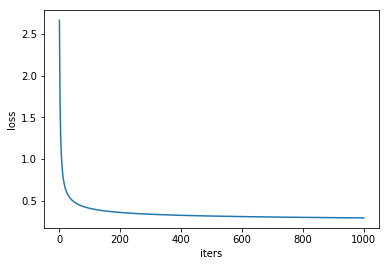

In [22]:
# 4.1 Train a feed forward network with 1 hidden layer
# Here we use Cross Entropy Loss with Softmax activation function
W = np.random.normal(0,0.1,(784,10))
num_point = len(y_train)
max_iterations = 1000
learning_rate = 1e-5
threshold = 0.0001
loss = num_point
iters = 0
loss_list = []
train_error_list = []
valid_error_list = []
while loss > threshold and iters < max_iterations:
    layer_output = x_train_vector.dot(W)
    y_predict = softmax(layer_output)
    loss = - np.sum(y_train * np.log(np.clip(y_predict,1e-15,np.inf)))/num_point
    grad = y_predict - y_train
    W_grad = x_train_vector.T.dot(grad)
    W -= learning_rate*W_grad
    iters += 1
    loss_list.extend([loss])
    if iters%20 == 0:
        y_max = np.argmax(y_predict,axis=1)
        train_error = 1-np.sum(y_train[range(len(y_train)),y_max])/len(y_train)        
        train_error_list.extend([train_error])
        layer_output = x_valid_vector.dot(W)
        y_predict = softmax(layer_output)
        y_max = np.argmax(y_predict,axis=1)
        valid_error = 1-np.sum(y_valid[range(len(y_valid)),y_max])/len(y_valid)        
        valid_error_list.extend([valid_error])
        print('iter %4d loss: %.3f train: %.3f valid: %.3f'%(iters,loss,train_error,valid_error))
plt.plot(range(1,1+iters),loss_list)
plt.xlabel('iters')
plt.ylabel('loss')
plt.show()

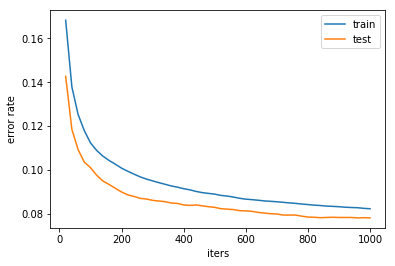

Final result: training error rate 0.082 testing error rate 0.078


In [23]:
plt.plot(range(20,1+iters,20),train_error_list)
plt.plot(range(20,1+iters,20),valid_error_list)
plt.legend(['train','test'])
plt.xlabel('iters')
plt.ylabel('error rate')
plt.show()

print('Final result: training error rate %.3f testing error rate %.3f'%(train_error_list[-1],valid_error_list[-1]))

iter   20 loss: 0.598 train: 0.160 valid: 0.139
iter   40 loss: 0.447 train: 0.123 valid: 0.113
iter   60 loss: 0.398 train: 0.111 valid: 0.103
iter   80 loss: 0.371 train: 0.105 valid: 0.098
iter  100 loss: 0.355 train: 0.101 valid: 0.094
iter  120 loss: 0.343 train: 0.098 valid: 0.090
iter  140 loss: 0.335 train: 0.095 valid: 0.087
iter  160 loss: 0.328 train: 0.093 valid: 0.086
iter  180 loss: 0.323 train: 0.092 valid: 0.085
iter  200 loss: 0.318 train: 0.090 valid: 0.084
iter  220 loss: 0.314 train: 0.089 valid: 0.083
iter  240 loss: 0.311 train: 0.088 valid: 0.082
iter  260 loss: 0.308 train: 0.087 valid: 0.082
iter  280 loss: 0.305 train: 0.087 valid: 0.082
iter  300 loss: 0.303 train: 0.086 valid: 0.081
iter  320 loss: 0.301 train: 0.085 valid: 0.080
iter  340 loss: 0.299 train: 0.084 valid: 0.080
iter  360 loss: 0.297 train: 0.083 valid: 0.080
iter  380 loss: 0.295 train: 0.083 valid: 0.079
iter  400 loss: 0.293 train: 0.082 valid: 0.079
iter  420 loss: 0.292 train: 0.082 valid

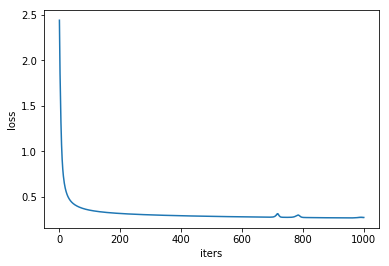

In [24]:
# 4.2 feed forward network with 2 hidden layers
# 4.1 Train a feed forward network with 1 hidden layer
# Here we use Cross Entropy Loss with Softmax activation function
W1 = np.random.normal(0,0.1,(784,32))
W2 = np.random.normal(0,0.1,(32,10))
num_point = len(y_train)
max_iterations = 1000
learning_rate = 1e-5
threshold = 0.0001
loss = num_point
iters = 0
loss_list = []
train_error_list = []
valid_error_list = []
while loss > threshold and iters < max_iterations:
    layer_output_1 = x_train_vector.dot(W1)
    layer_output_2 = layer_output_1.dot(W2)
    y_predict = softmax(layer_output_2)
    loss = - np.sum(y_train * np.log(np.clip(y_predict,1e-15,np.inf)))/num_point
    grad_2 = y_predict - y_train
    W_grad_2 = layer_output_1.T.dot(grad_2)
    grad_1 = (y_predict - y_train).dot(W2.T)
    W_grad_1 = x_train_vector.T.dot(grad_1)
    
    W2 -= learning_rate*W_grad_2#/num_point
    W1 -= learning_rate*W_grad_1#/num_point
    
    iters += 1
    loss_list.extend([loss])
    
    if iters%20 == 0:
        y_max = np.argmax(y_predict,axis=1)
        train_error = 1-np.sum(y_train[range(len(y_train)),y_max])/len(y_train)        
        train_error_list.extend([train_error])
        layer_output_1 = x_valid_vector.dot(W1)
        layer_output_2 = layer_output_1.dot(W2)
        y_predict = softmax(layer_output_2)
        y_max = np.argmax(y_predict,axis=1)
        valid_error = 1-np.sum(y_valid[range(len(y_valid)),y_max])/len(y_valid)        
        valid_error_list.extend([valid_error])
        print('iter %4d loss: %.3f train: %.3f valid: %.3f'%(iters,loss,train_error,valid_error))
plt.plot(range(1,1+iters),loss_list)
plt.xlabel('iters')
plt.ylabel('loss')
plt.show()

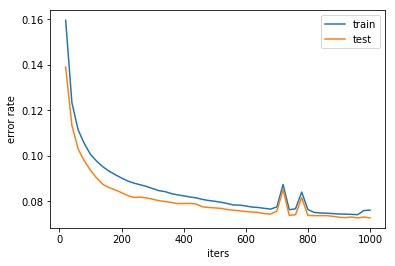

Final result: training error rate 0.076 testing error rate 0.073


In [32]:
plt.plot(range(20,1+iters,20),train_error_list)
plt.plot(range(20,1+iters,20),valid_error_list)
plt.legend(['train','test'])
plt.xlabel('iters')
plt.ylabel('error rate')
plt.show()

print('Final result: training error rate %.3f testing error rate %.3f'%(train_error_list[-1],valid_error_list[-1]))

iter   20 loss: 0.690 train: 0.196 valid: 0.164
iter   40 loss: 0.496 train: 0.144 valid: 0.125
iter   60 loss: 0.444 train: 0.126 valid: 0.112
iter   80 loss: 0.418 train: 0.117 valid: 0.106
iter  100 loss: 0.401 train: 0.113 valid: 0.102
iter  120 loss: 0.389 train: 0.110 valid: 0.098
iter  140 loss: 0.379 train: 0.107 valid: 0.096
iter  160 loss: 0.371 train: 0.105 valid: 0.094
iter  180 loss: 0.365 train: 0.103 valid: 0.093
iter  200 loss: 0.359 train: 0.102 valid: 0.092
iter  220 loss: 0.354 train: 0.100 valid: 0.091
iter  240 loss: 0.350 train: 0.098 valid: 0.090
iter  260 loss: 0.346 train: 0.097 valid: 0.089
iter  280 loss: 0.342 train: 0.096 valid: 0.088
iter  300 loss: 0.339 train: 0.095 valid: 0.087
iter  320 loss: 0.336 train: 0.094 valid: 0.087
iter  340 loss: 0.334 train: 0.093 valid: 0.086
iter  360 loss: 0.331 train: 0.092 valid: 0.086
iter  380 loss: 0.329 train: 0.092 valid: 0.085
iter  400 loss: 0.327 train: 0.091 valid: 0.085
iter  420 loss: 0.325 train: 0.091 valid

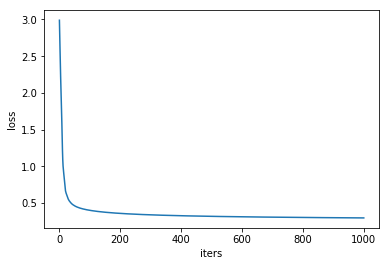

In [33]:
# 4.3 Retrain the network in part 1 with regularization and momentum and report the results
W = np.random.normal(0,0.1,(784,10))
num_point = len(y_train)
max_iterations = 1000
learning_rate = 1e-5
threshold = 0.0001
sigma = 1e-5
beta = 0.9
loss = num_point
iters = 0
W_Momentum = np.zeros(W.shape)
loss_list = []
train_error_list = []
valid_error_list = []
while loss > threshold and iters < max_iterations:
    layer_output = x_train_vector.dot(W)
    y_predict = softmax(layer_output)
    loss = - np.sum(y_train * np.log(y_predict))/num_point + sigma*np.sum(W**2)
    grad = y_predict - y_train
    W_grad = x_train_vector.T.dot(grad) + sigma*2*W
    W_Momentum = beta*W_Momentum + (1-beta)*W_grad
    W -= learning_rate*W_Momentum
    iters += 1
    loss_list.extend([loss])
    if iters%20 == 0:
        y_max = np.argmax(y_predict,axis=1)
        train_error = 1-np.sum(y_train[range(len(y_train)),y_max])/len(y_train)        
        train_error_list.extend([train_error])
        layer_output = x_valid_vector.dot(W)
        y_predict = softmax(layer_output)
        y_max = np.argmax(y_predict,axis=1)
        valid_error = 1-np.sum(y_valid[range(len(y_valid)),y_max])/len(y_valid)        
        valid_error_list.extend([valid_error])
        print('iter %4d loss: %.3f train: %.3f valid: %.3f'%(iters,loss,train_error,valid_error))
plt.plot(range(1,1+iters),loss_list)
plt.xlabel('iters')
plt.ylabel('loss')
plt.show()

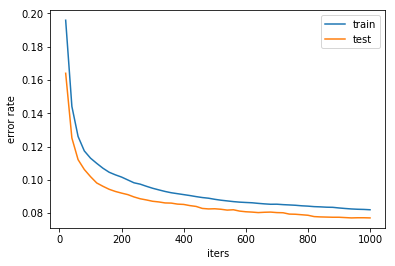

Final result: training error rate 0.082 testing error rate 0.077


In [34]:
plt.plot(range(20,1+iters,20),train_error_list)
plt.plot(range(20,1+iters,20),valid_error_list)
plt.legend(['train','test'])
plt.xlabel('iters')
plt.ylabel('error rate')
plt.show()

print('Final result: training error rate %.3f testing error rate %.3f'%(train_error_list[-1],valid_error_list[-1]))

### 5 Convolutional Neural Network 

In [23]:
from keras.datasets import cifar10
import keras
import numpy as np
import cv2
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_VGG = np.array(x_train,dtype=np.float32)
x_test_VGG = np.array(x_test,dtype=np.float32)

'''
x_train_VGG = np.zeros((50000,224,224,3),dtype = np.float32)
for index in range(50000):
    x_train_VGG[index,:,:,:] = cv2.resize(x_train[index,:,:,:],(224,224))
x_test_VGG = np.zeros((10000,224,224,3),dtype = np.float32)
for index in range(10000):
    x_test_VGG[index,:,:,:] = cv2.resize(x_test[index,:,:,:],(224,224))
'''
y_train_VGG = keras.utils.to_categorical(y_train, 10)
y_test_VGG = keras.utils.to_categorical(y_test, 10)

1. Stochastic Gradient Descent [4]
2. Batch Normalization
3. Replace the fully connected layer by average pooling layer
4. Adaptive Gradient [bonus + 2] [3]
5. Nesterov’s Accelerated Gradient [bonus + 2] [4]
6. RMSprop [bonus +2] [3]

In [151]:
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
import numpy as np

img_input = Input((32,32,3))
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
'''
# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
'''
# Final Block
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=img_input, outputs=predictions)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_51 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [91]:
BATCH_SIZE = 128
MAX_EPOCH = 50
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])
history_SGD_1 = model.fit(x_train_VGG, y_train_VGG,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test_VGG, y_test_VGG))
score = model.evaluate(x_test_VGG, y_test_VGG, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.9752 - acc: 0.2917 - val_loss: 1.7017 - val_acc: 0.3904
Epoch 2/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.6618 - acc: 0.4039 - val_loss: 1.6621 - val_acc: 0.4201
Epoch 3/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.5181 - acc: 0.4576 - val_loss: 1.4824 - val_acc: 0.4653
Epoch 4/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.4184 - acc: 0.4944 - val_loss: 1.4592 - val_acc: 0.4728
Epoch 5/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.3378 - acc: 0.5233 - val_loss: 1.2845 - val_acc: 0.5382
Epoch 6/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.2664 - acc: 0.5471 - val_loss: 1.2978 - val_acc: 0.5329
Epoch 7/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.2033 - acc: 0.5744 - val_loss: 1.

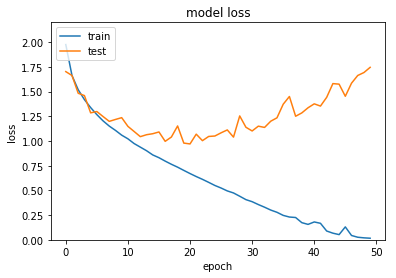

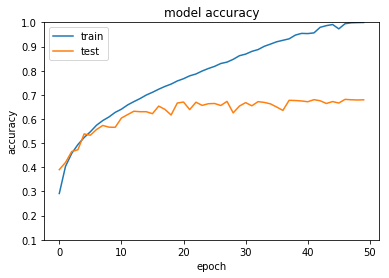

In [168]:
# summarize history for loss
plt.plot(history_SGD_1.history['loss'])
plt.plot(history_SGD_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,2.2)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history_SGD_1.history['acc'])
plt.plot(history_SGD_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.1,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [149]:
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
import numpy as np

img_input = Input((32,32,3))
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
'''
# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
'''
# Final Block
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=img_input, outputs=predictions)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [93]:
BATCH_SIZE = 128
MAX_EPOCH = 50
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])
history_SGD_2 = model.fit(x_train_VGG, y_train_VGG,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test_VGG, y_test_VGG))
score = model.evaluate(x_test_VGG, y_test_VGG, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 236us/step - loss: 2.1698 - acc: 0.1813 - val_loss: 2.0338 - val_acc: 0.2514
Epoch 2/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.9871 - acc: 0.2826 - val_loss: 2.0732 - val_acc: 0.2518
Epoch 3/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.8747 - acc: 0.3281 - val_loss: 1.8847 - val_acc: 0.3191
Epoch 4/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.7769 - acc: 0.3587 - val_loss: 1.7226 - val_acc: 0.3710
Epoch 5/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.7038 - acc: 0.3837 - val_loss: 1.6612 - val_acc: 0.3947
Epoch 6/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.6365 - acc: 0.4097 - val_loss: 1.5955 - val_acc: 0.4206
Epoch 7/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.5869 - acc: 0.4264 - val_loss: 1.5

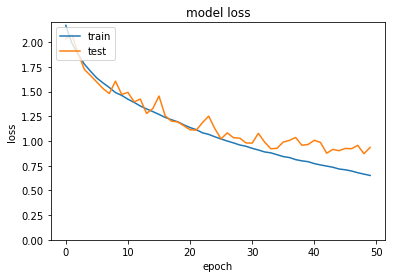

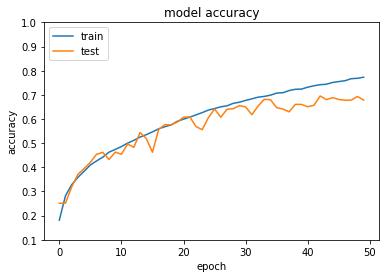

In [169]:
# summarize history for loss
plt.plot(history_SGD_2.history['loss'])
plt.plot(history_SGD_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,2.2)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history_SGD_2.history['acc'])
plt.plot(history_SGD_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.1,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [120]:
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np

img_input = Input((32,32,3))
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
'''
# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
'''
# Final Block
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=img_input, outputs=predictions)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_140 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_141 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
__________

In [95]:
BATCH_SIZE = 128
MAX_EPOCH = 50
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])
history_SGD_3 = model.fit(x_train_VGG, y_train_VGG,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test_VGG, y_test_VGG))
score = model.evaluate(x_test_VGG, y_test_VGG, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 267us/step - loss: 2.0653 - acc: 0.2551 - val_loss: 1.9189 - val_acc: 0.3186
Epoch 2/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.8270 - acc: 0.3557 - val_loss: 1.7386 - val_acc: 0.3887
Epoch 3/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.6504 - acc: 0.4240 - val_loss: 1.5751 - val_acc: 0.4490
Epoch 4/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.5010 - acc: 0.4786 - val_loss: 1.4890 - val_acc: 0.4786
Epoch 5/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.3882 - acc: 0.5161 - val_loss: 1.3747 - val_acc: 0.5193
Epoch 6/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.2998 - acc: 0.5458 - val_loss: 1.3190 - val_acc: 0.5288
Epoch 7/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.2288 - acc: 0.5677 - val_loss: 1.

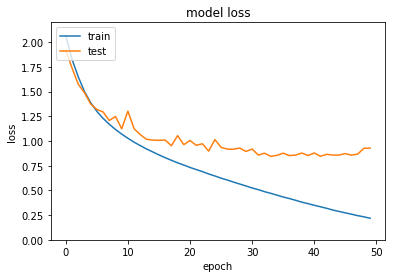

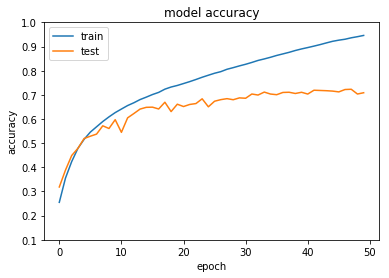

In [170]:
# summarize history for loss
plt.plot(history_SGD_3.history['loss'])
plt.plot(history_SGD_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,2.2)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history_SGD_3.history['acc'])
plt.plot(history_SGD_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.1,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [121]:
BATCH_SIZE = 128
MAX_EPOCH = 50
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])
history_RMSprop_nodrop = model.fit(x_train_VGG, y_train_VGG,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test_VGG, y_test_VGG))
score = model.evaluate(x_test_VGG, y_test_VGG, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 295us/step - loss: 1.3123 - acc: 0.5213 - val_loss: 1.5995 - val_acc: 0.4860
Epoch 2/50
50000/50000 [==============================] - 12s 230us/step - loss: 0.7803 - acc: 0.7228 - val_loss: 0.9352 - val_acc: 0.6845
Epoch 3/50
50000/50000 [==============================] - 11s 229us/step - loss: 0.5757 - acc: 0.7998 - val_loss: 1.0337 - val_acc: 0.6909
Epoch 4/50
50000/50000 [==============================] - 12s 231us/step - loss: 0.4524 - acc: 0.8434 - val_loss: 1.0933 - val_acc: 0.6813
Epoch 5/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.3579 - acc: 0.8771 - val_loss: 0.7822 - val_acc: 0.7710
Epoch 6/50
50000/50000 [==============================] - 11s 227us/step - loss: 0.2856 - acc: 0.9009 - val_loss: 0.8344 - val_acc: 0.7686
Epoch 7/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.2277 - acc: 0.9211 - val_loss: 0.

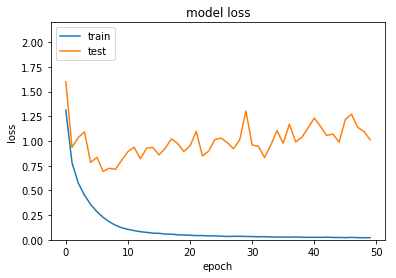

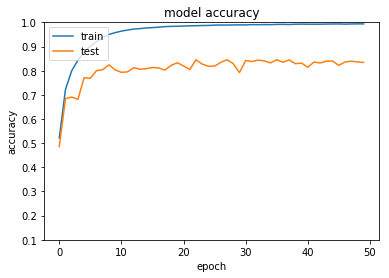

In [171]:
# summarize history for loss
plt.plot(history_RMSprop_nodrop.history['loss'])
plt.plot(history_RMSprop_nodrop.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,2.2)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history_RMSprop_nodrop.history['acc'])
plt.plot(history_RMSprop_nodrop.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.1,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [106]:
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization, Dropout
import numpy as np

img_input = Input((32,32,3))
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
x = Dropout(0.2)(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
x = Dropout(0.3)(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
x = Dropout(0.4)(x)
'''
# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
'''
# Final Block
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=img_input, outputs=predictions)
model.summary()p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_133 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_134 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 16, 16, 64)        0         
__________

In [103]:
BATCH_SIZE = 128
MAX_EPOCH = 50
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])
history_SGD_4 = model.fit(x_train_VGG, y_train_VGG,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test_VGG, y_test_VGG))
score = model.evaluate(x_test_VGG, y_test_VGG, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 301us/step - loss: 2.2862 - acc: 0.1914 - val_loss: 1.9612 - val_acc: 0.2939
Epoch 2/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.0321 - acc: 0.2555 - val_loss: 1.8533 - val_acc: 0.3342
Epoch 3/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.9277 - acc: 0.2953 - val_loss: 1.7633 - val_acc: 0.3548
Epoch 4/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.8424 - acc: 0.3305 - val_loss: 1.8035 - val_acc: 0.3575
Epoch 5/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.7782 - acc: 0.3575 - val_loss: 1.6776 - val_acc: 0.3914
Epoch 6/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.7208 - acc: 0.3780 - val_loss: 1.6545 - val_acc: 0.4093
Epoch 7/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.6820 - acc: 0.3936 - val_loss: 1.

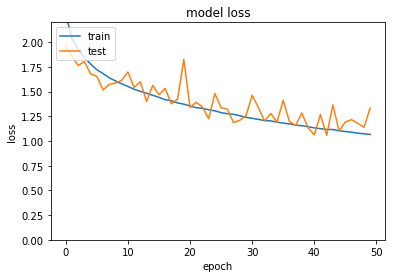

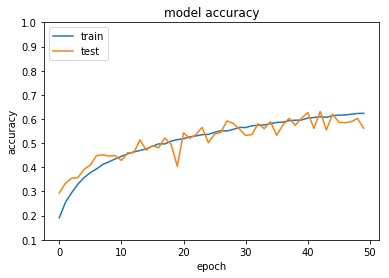

In [172]:
# summarize history for loss
plt.plot(history_SGD_4.history['loss'])
plt.plot(history_SGD_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,2.2)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history_SGD_4.history['acc'])
plt.plot(history_SGD_4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.1,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [98]:
BATCH_SIZE = 128
MAX_EPOCH = 50
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])
history_Adagrad = model.fit(x_train_VGG, y_train_VGG,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test_VGG, y_test_VGG))
score = model.evaluate(x_test_VGG, y_test_VGG, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 288us/step - loss: 1.5609 - acc: 0.4375 - val_loss: 1.7541 - val_acc: 0.3955
Epoch 2/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.1060 - acc: 0.6158 - val_loss: 1.0400 - val_acc: 0.6258
Epoch 3/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.9401 - acc: 0.6768 - val_loss: 0.9982 - val_acc: 0.6581
Epoch 4/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.8251 - acc: 0.7177 - val_loss: 0.8195 - val_acc: 0.7123
Epoch 5/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.7415 - acc: 0.7489 - val_loss: 0.6885 - val_acc: 0.7575
Epoch 6/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.6700 - acc: 0.7727 - val_loss: 0.6448 - val_acc: 0.7715
Epoch 7/50
50000/50000 [==============================] - 12s 240us/step - loss: 0.6114 - acc: 0.7975 - val_loss: 0.

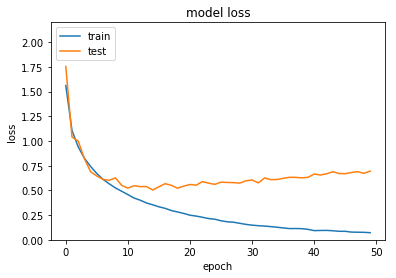

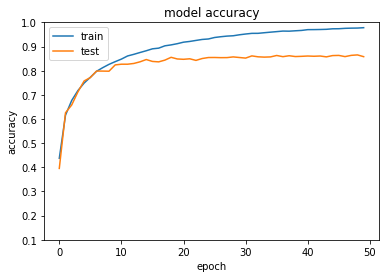

In [173]:
# summarize history for loss
plt.plot(history_Adagrad.history['loss'])
plt.plot(history_Adagrad.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,2.2)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history_Adagrad.history['acc'])
plt.plot(history_Adagrad.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.1,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [105]:
BATCH_SIZE = 128
MAX_EPOCH = 50
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])
history_Nadam = model.fit(x_train_VGG, y_train_VGG,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test_VGG, y_test_VGG))
score = model.evaluate(x_test_VGG, y_test_VGG, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.5625 - acc: 0.4508 - val_loss: 1.9672 - val_acc: 0.4389
Epoch 2/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.0304 - acc: 0.6474 - val_loss: 1.2605 - val_acc: 0.5755
Epoch 3/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.8213 - acc: 0.7260 - val_loss: 0.8337 - val_acc: 0.7186
Epoch 4/50
50000/50000 [==============================] - 13s 254us/step - loss: 0.6931 - acc: 0.7735 - val_loss: 0.7237 - val_acc: 0.7626
Epoch 5/50
50000/50000 [==============================] - 13s 256us/step - loss: 0.6096 - acc: 0.8024 - val_loss: 0.6445 - val_acc: 0.7918
Epoch 6/50
50000/50000 [==============================] - 13s 251us/step - loss: 0.5340 - acc: 0.8278 - val_loss: 0.5692 - val_acc: 0.8096
Epoch 7/50
50000/50000 [==============================] - 13s 254us/step - loss: 0.4824 - acc: 0.8454 - val_loss: 0.

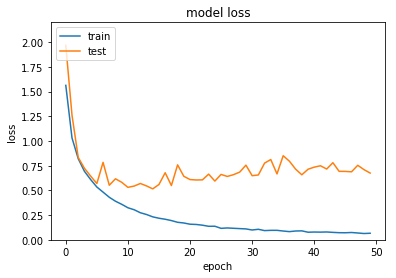

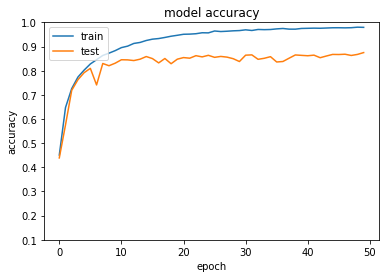

In [174]:
# summarize history for loss
plt.plot(history_Nadam.history['loss'])
plt.plot(history_Nadam.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,2.2)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history_Nadam.history['acc'])
plt.plot(history_Nadam.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.1,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [107]:
BATCH_SIZE = 128
MAX_EPOCH = 50
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])
history_RMSprop = model.fit(x_train_VGG, y_train_VGG,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test_VGG, y_test_VGG))
score = model.evaluate(x_test_VGG, y_test_VGG, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.5991 - acc: 0.4330 - val_loss: 1.6797 - val_acc: 0.4591
Epoch 2/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.0683 - acc: 0.6324 - val_loss: 1.0910 - val_acc: 0.6369
Epoch 3/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.8587 - acc: 0.7119 - val_loss: 0.9857 - val_acc: 0.6677
Epoch 4/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.7303 - acc: 0.7604 - val_loss: 0.7986 - val_acc: 0.7431
Epoch 5/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.6381 - acc: 0.7930 - val_loss: 0.7648 - val_acc: 0.7548
Epoch 6/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.5716 - acc: 0.8161 - val_loss: 0.6257 - val_acc: 0.7989
Epoch 7/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.5098 - acc: 0.8353 - val_loss: 0.

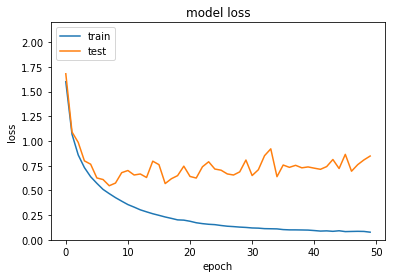

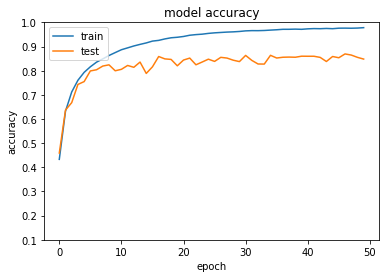

In [175]:
# summarize history for loss
plt.plot(history_RMSprop.history['loss'])
plt.plot(history_RMSprop.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,2.2)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history_RMSprop.history['acc'])
plt.plot(history_RMSprop.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.1,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()